In [2]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from nltk.metrics.distance import jaccard_distance
import spacy
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from textserver import TextServer
import config

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

nlp = spacy.load("en_core_web_sm")


[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 8] nodename nor servname provided, or not
[nltk_data]     known>
[nltk_data] Error loading maxent_ne_chunker_tab: <urlopen error [Errno
[nltk_data]     8] nodename nor servname provided, or not known>
[nltk_data] Error loading words: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [9]:
sentence = "Donald Trump is working at Google since 1994."
res = nltk.ne_chunk(
        nltk.pos_tag(
          nltk.word_tokenize(sentence)))


In [10]:
type(res)  # 👉  nltk.tree.tree.Tree

nltk.tree.tree.Tree

In [11]:
print(res)


(S
  (PERSON Donald/NNP)
  (ORGANIZATION Trump/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP)
  since/IN
  1994/CD
  ./.)


In [7]:
print(dir(res))

['__add__', '__class__', '__class_getitem__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_frozen_class', '_get_node', '_label', '_parse_error', '_pformat_flat', '_repr_svg_', '_set_node', 'append', 'chomsky_normal_form', 'clear', 'collapse_unary', 'convert', 'copy', 'count', 'draw', 'extend', 'flatten', 'freeze', 'fromlist', 'fromstring', 'height', 'index', 'insert', 'label', 'leaf_treeposition', 'leaves', 'node', 'pformat', 'pformat_latex_qtree', 'pop', 'pos', 'pprint', 'pretty_print', 'productions', '

In [8]:
print(res)


(S
  (PERSON Mark/NNP)
  (ORGANIZATION Pedersen/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP)
  since/IN
  1994/CD
  ./.)


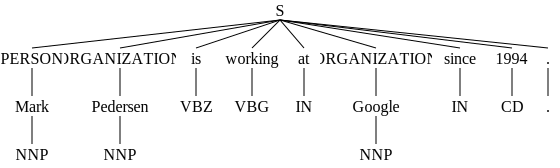

In [5]:
res

In [9]:
sentence = "Mark Pedersen works at Google since 1994."
doc = nlp(sentence)
[(token.text, token.pos_, token.tag_, token.lemma_, token.is_stop, 
  token.ent_iob_, token.ent_type_) for token in doc]

[('Mark', 'PROPN', 'NNP', 'Mark', False, 'B', 'PERSON'),
 ('Pedersen', 'PROPN', 'NNP', 'Pedersen', False, 'I', 'PERSON'),
 ('works', 'VERB', 'VBZ', 'work', False, 'O', ''),
 ('at', 'ADP', 'IN', 'at', True, 'O', ''),
 ('Google', 'PROPN', 'NNP', 'Google', False, 'B', 'ORG'),
 ('since', 'SCONJ', 'IN', 'since', True, 'O', ''),
 ('1994', 'NUM', 'CD', '1994', False, 'B', 'DATE'),
 ('.', 'PUNCT', '.', '.', False, 'O', '')]

In [10]:
[(ent.text, ent.label_) for ent in doc.ents]

[('Mark Pedersen', 'PERSON'), ('Google', 'ORG'), ('1994', 'DATE')]

In [11]:
spacy.displacy.render(doc, style="ent", jupyter=True)

In [12]:
with doc.retokenize() as retokenizer:
    tokens = [token for token in doc]
    for ent in doc.ents:
        retokenizer.merge(doc[ent.start:ent.end], 
            attrs={"LEMMA": " ".join([tokens[i].text 
                                for i in range(ent.start, ent.end)])})
[(token.text, token.pos_, token.tag_, token.lemma_, token.is_stop, 
  token.ent_iob_, token.ent_type_) for token in doc]

[('Mark Pedersen', 'PROPN', 'NNP', 'Mark Pedersen', False, 'B', 'PERSON'),
 ('works', 'VERB', 'VBZ', 'work', False, 'O', ''),
 ('at', 'ADP', 'IN', 'at', True, 'O', ''),
 ('Google', 'PROPN', 'NNP', 'Google', False, 'B', 'ORG'),
 ('since', 'SCONJ', 'IN', 'since', True, 'O', ''),
 ('1994', 'NUM', 'CD', '1994', False, 'B', 'DATE'),
 ('.', 'PUNCT', '.', '.', False, 'O', '')]